# Lab 5

## Higgs Classification

In this problem we are going to look at an inclusive search for the standard model Higgs boson in pp collisions at √ s = 13 TeV at the LHC using simulated data [A. Schuy]. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet[Phys. Rev. Lett. 120, 071802 (2018)]. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data.

Both of you will use the same training samples for analysis. Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR' [Eur. Phys. J. C 79 (2019) 836]. You can explore different strategies for event selection optimization using training samples. The optimal event selection will be applied to pseudo-experiment data.

In [2]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pickle

In [6]:
higgs_file = open("Higgs_data/Sample_pt_250_500/higgs_100000_pt_250_500.pkl", 'rb')
higgs_dict = pickle.load(higgs_file)
qcd_file = open("Higgs_data/Sample_pt_250_500/qcd_100000_pt_250_500.pkl", 'rb')
qcd_dict = pickle.load(qcd_file)

print(higgs_dict.keys()) # qcd_dict has same keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [16]:
# Lets explore the data!

pt_h = higgs_dict['pt']
eta_h = higgs_dict['eta']
phi_h = higgs_dict['phi']
mass_h = higgs_dict['mass']
ee2_h = higgs_dict['ee2']
ee3_h = higgs_dict['ee3']
d2_h = higgs_dict['d2']
ang_h = higgs_dict['angularity']
t1_h = higgs_dict['t1']
t2_h = higgs_dict['t2']
t3_h = higgs_dict['t3']
t21_h = higgs_dict['t21']
t32_h = higgs_dict['t32']
KtDeltaR_h = higgs_dict['KtDeltaR']

pt_q = qcd_dict['pt']
eta_q = qcd_dict['eta']
phi_q = qcd_dict['phi']
mass_q = qcd_dict['mass']
ee2_q = qcd_dict['ee2']
ee3_q = qcd_dict['ee3']
d2_q = qcd_dict['d2']
ang_q = qcd_dict['angularity']
t1_q = qcd_dict['t1']
t2_q = qcd_dict['t2']
t3_q = qcd_dict['t3']
t21_q = qcd_dict['t21']
t32_q = qcd_dict['t32']
KtDeltaR_q = qcd_dict['KtDeltaR']

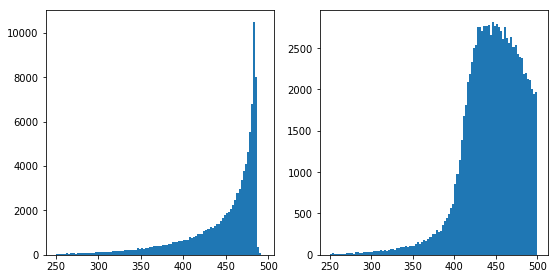

In [20]:
# higgs is the higgs candidate jets
# qcd is the expected background distribution

# pt is the transverse momentum of the jet, lets histogram plot them. 
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(pt_h, bins=100);
axes[1].hist(pt_q, bins=100);

These plots indicate that there is a large descrepancy between the background QCD data and the higgs data based on the momentum of the particles. 

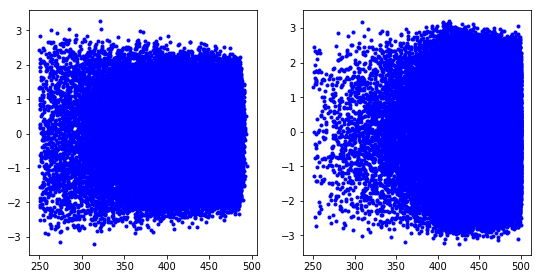

In [26]:
# eta is the pseudorapidity of the jet, and describes the angle of the 
# particle to the axis. It is related to momentum, so lets plot those 
# together.

figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, eta_h, '.b');
axes[1].plot(pt_q, eta_q, '.b');

This did not appear to produce anything of value. Lets return to this later with phi.

Now lets move on to phi. This is the azimuthal angle from the beam axis, unlike the polar angle which is related to eta. Lets also graph this against momentum, as they will also be related.

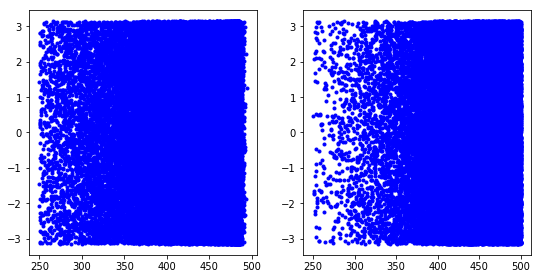

In [38]:
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(pt_h, phi_h, '.b');
axes[1].plot(pt_q, phi_q, '.b');

Again, this is uneventful. Lets check this against pseudorapidity, see if they have a correlation.

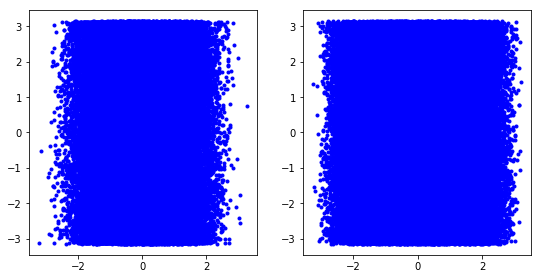

In [28]:
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(eta_h, phi_h, '.b');
axes[1].plot(eta_q, phi_q, '.b');

This also seems fairly uneventful.

Now lets look at mass. Mass is going to be in eV since this is particle physics. Lets see a mass histogram.

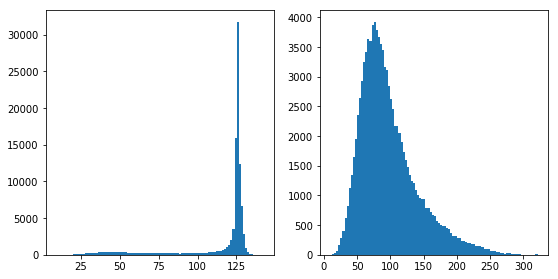

In [39]:
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(mass_h, bins=100);
axes[1].hist(mass_q, bins=100);

It seems that the higgs mass is going to be pretty much always around 125 GeV. Good to know.

Now lets look at everything so far against mass.

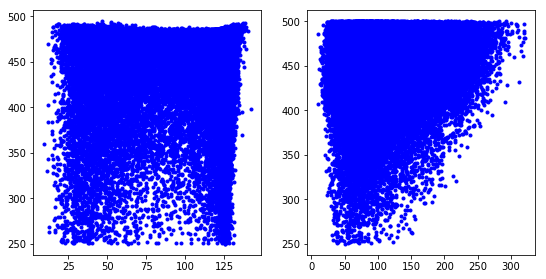

In [34]:
# momentum
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, pt_h, '.b');
axes[1].plot(mass_q, pt_q, '.b');

Ooh, now thats interesting. For the higgs data, there is a less dense part inbetween about 40 to 120 GeV of mass, but for the QCD background the mass increases linearly.

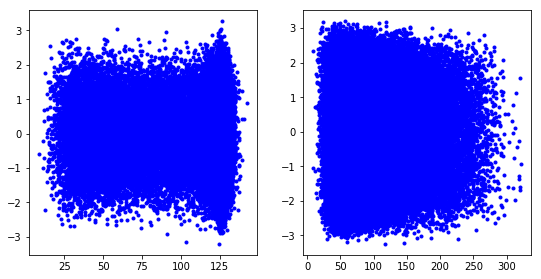

In [35]:
# pseudorapidity
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, eta_h, '.b');
axes[1].plot(mass_q, eta_q, '.b');

This isn't especially interesting, except that it seems a wider pseudorapidity is possible for the higgs data when the particle has more mass.

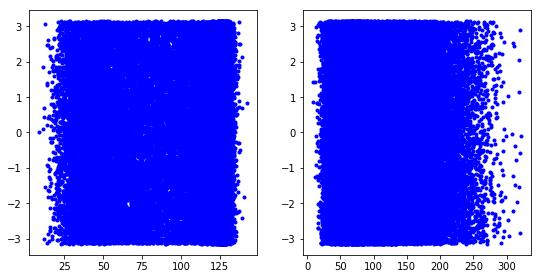

In [37]:
# Azimuthal angle
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].plot(mass_h, phi_h, '.b');
axes[1].plot(mass_q, phi_q, '.b');

Nothing interesting here.

Moving on to ee2. This is the 2-point energy correlation function ratio. This function gives us a discriminator to determine if the given data is a 2 prong jet substructure without requiring subjets discovery algorithyms. It is based on momentum and pseudorapidity, so I will graph ee2 versus both of those, in addition to a histogram of the ee2 values.

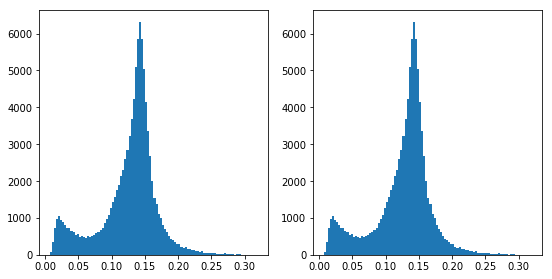

In [41]:
# histogram
figure = plt.figure(figsize=(9, 4.5))
axes = figure.subplots(1, 2)

axes[0].hist(ee2_h, bins=100);
axes[1].hist(ee2_h, bins=100);

Wow, these look identical to me! I suppose we shall see if ee3 is the same way, but for now this would strongly indicate to me that the higgs data is of the form of 2 prong jet substructure.